<a href="https://colab.research.google.com/github/fathurrahmanyahyasatrio/FintechProjects/blob/main/Fintect%20Project%20Part%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import numpy as np
import pandas as pd


PART I: In the initial phase, we thoroughly explore the business issue and dedicate our utmost attention to examining and readying the dataset.

PART II (this section): In this article, we construct our initial machine learning model, assess its effectiveness, and gain insight into how the model makes decisions through interpretability analysis.

PART III: We create and enhance various models to identify the most effective one.

PART IV: We develop and assess a Neural Network model, comparing its performance to that of the previous models.

PART V: Finally, we transition to a practical phase by deploying and making our top-performing model accessible to the public.

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

# What kind of machine learning approach would address the fintech issue?

Firstly, we need to determine the most suitable machine learning approach for aiding us in predicting the loan outcomes we discussed in the previous section. In the machine learning world, there are 3 primary techniques: classification, regression, and clustering. Typically, classification and regression fall unde the category of supervised, learning, while clustering belongs to unsupervised learning.

The primary distinction between regression and classification algorithms lies in their objectives. Regression algorithms aim to predict continuous values, such as price, salary, age, etc, whereas classification algorithms are designed to predict or classify discrete values, such as male or female, true, or false.

To explain furthe in this case, the aim is to predict two outcomes:
1. Applicants likely to fully repay the loans.
2. Applicants likely to charged off.



In [ ]:
loans = pd.read_csv('mycsvfile.csv')
loans.head()

,loan_amnt,term,sub_grade,emp_length,annual_inc,loan_status,dti,mths_since_recent_inq,revol_util,num_op_rev_tl,...,addr_state__SD,addr_state__TN,addr_state__TX,addr_state__UT,addr_state__VA,addr_state__VT,addr_state__WA,addr_state__WI,addr_state__WV,addr_state__WY
0,3600.0,1.0,24.0,10.0,55000.0,1.0,5.91,4.0,29.7,4.0,...,0,0,0,0,0,0,0,0,0,0
1,20000.0,2.0,14.0,10.0,63000.0,1.0,10.78,10.0,56.2,4.0,...,0,0,0,0,0,0,0,0,0,0
2,10400.0,2.0,51.0,3.0,104433.0,1.0,25.37,1.0,64.5,7.0,...,0,0,0,0,0,0,0,0,0,0
3,20000.0,1.0,11.0,10.0,85000.0,1.0,17.61,8.0,5.7,3.0,...,0,0,0,0,0,0,0,0,0,0
4,10000.0,1.0,2.0,6.0,85000.0,1.0,13.07,1.0,34.5,13.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
loans.describe()

,loan_amnt,term,sub_grade,emp_length,annual_inc,loan_status,dti,mths_since_recent_inq,revol_util,num_op_rev_tl,...,addr_state__SD,addr_state__TN,addr_state__TX,addr_state__UT,addr_state__VA,addr_state__VT,addr_state__WA,addr_state__WI,addr_state__WV,addr_state__WY
count,848454.000000,848454.000000,848454.000000,848454.000000,848454.000000,848454.000000,848454.000000,848454.000000,848454.000000,848454.000000,...,848454.000000,848454.000000,848454.000000,848454.000000,848454.000000,848454.000000,848454.000000,848454.000000,848454.000000,848454.000000
mean,14685.697457,1.268249,21.268733,6.145857,72400.496752,0.792473,18.575478,6.705665,52.912851,8.344402,...,0.002113,0.015782,0.085755,0.007478,0.027221,0.002114,0.022196,0.013875,0.003502,0.002349
std,8280.771514,0.443048,12.763837,3.662421,25589.248556,0.405536,8.199811,5.820888,23.374794,4.340655,...,0.045922,0.124630,0.280002,0.086153,0.162728,0.045934,0.147320,0.116971,0.059071,0.048409
min,1000.000000,1.000000,1.000000,0.000000,35000.990000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,1.000000,12.000000,3.000000,51500.000000,1.000000,12.510000,2.000000,35.700000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13000.000000,1.000000,21.000000,7.000000,67600.000000,1.000000,18.130000,5.000000,53.200000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,2.000000,31.000000,10.000000,90000.000000,1.000000,24.360000,10.000000,70.700000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40000.000000,2.000000,65.000000,10.000000,144999.000000,1.000000,45.000000,25.000000,148.000000,35.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1.0    672377
0.0    176077
Name: loan_status, dtype: int64


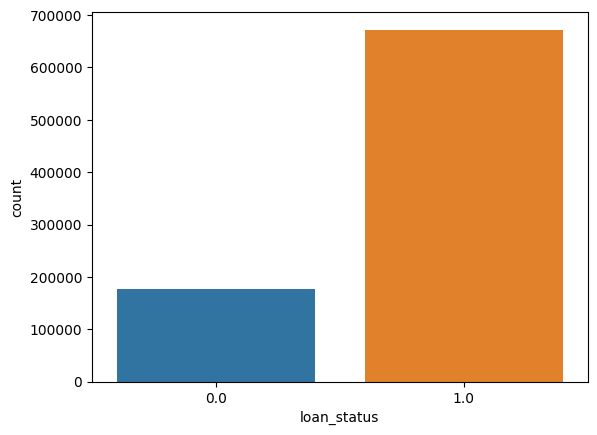

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(loans.loan_status.value_counts())
sns.countplot(x='loan_status', data=loans)
plt.show()

# Train and Test Split

In [ ]:
X = loans.drop('loan_status', axis=1)
y = loans[['loan_status']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve



In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.79


# Logistic Regression Confusion Matrix

Is the 79% accuracy of the model an impressive figure? Let's explore this question further. To begin with, what does accuracy represent? Accuracy is a measure of the percentage of correct predictions out of the total number of predictions made.

In a scenario where the dataset is evenly balanced, meaning that class A and class B are in a 50/50 ratio, achieving an accuracy of 79% may seem quite reasonable. However, real-world datasets often exhibit class imbalances, making the accuracy metric less reliable in such cases.

For instance, imagine that 98% of the samples in our training set belong to class A, while only 2% belong to class B. In this situation, a model could easily achieve a high training accuracy of 98% by simply predicting every training sample as belonging to class A. However, when the same model is tested on a separate dataset where there are 60% samples of class A and 40% samples of class B, the test accuracy would drop to 60%. This highlights how accuracy can provide a misleading impression of high performance in such cases.

To gain a more comprehensive understanding of our model's performance, we can utilize a confusion matrix. A confusion matrix is an N x N matrix employed to assess the performance of a classification model, where N represents the number of target classes. This matrix enables a direct comparison between the actual target values and the predictions made by the model, offering deeper insights into its performance.

In [ ]:
logreg_conf_matrix = confusion_matrix(y_test, y_pred)
logreg_conf_matrix

array([[  2686,  41333],
       [  3020, 165075]])

<Axes: >

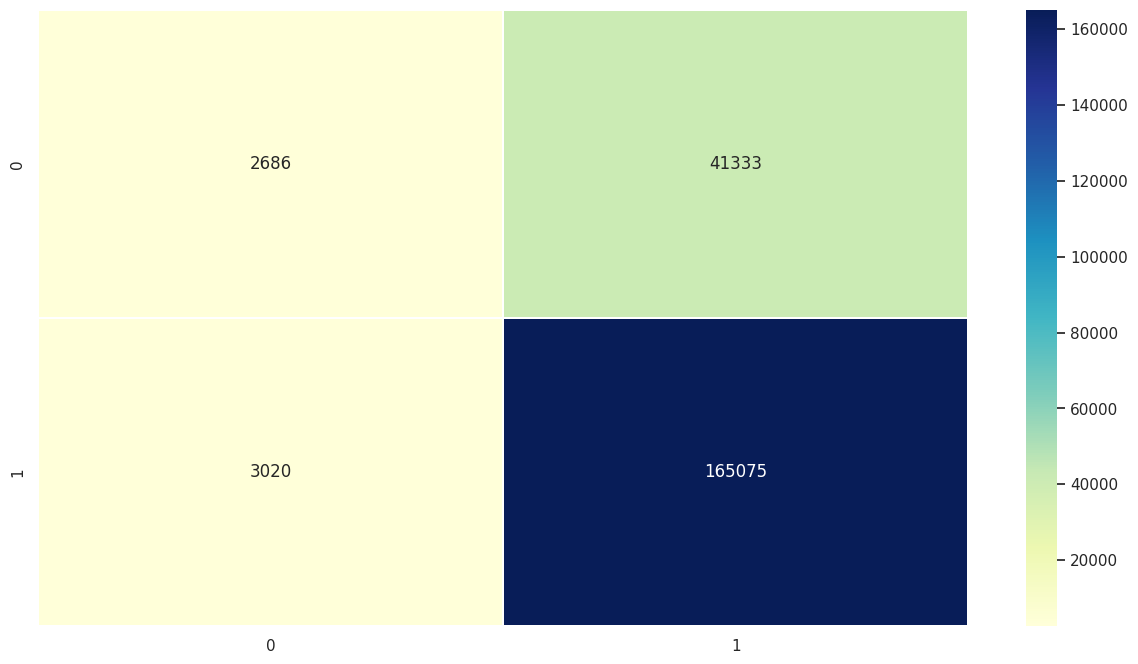

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(logreg_conf_matrix, annot=True, cmap='YlGnBu', linewidths=.29,fmt='d')

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

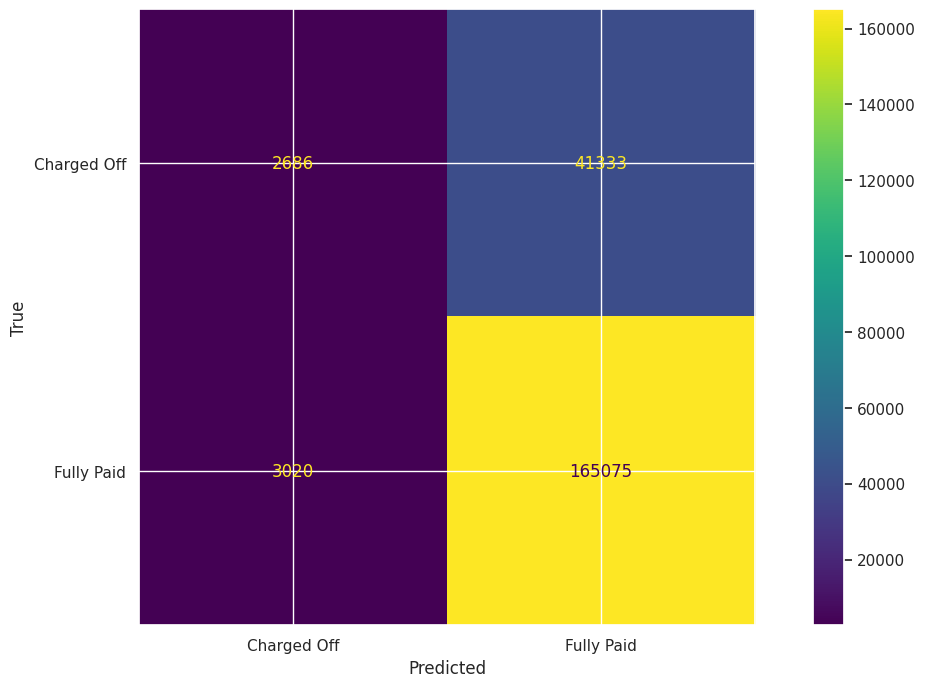

In [ ]:
cm = confusion_matrix(y_test, y_pred)
#cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Charged Off','Fully Paid'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')


The key is to have a clear understanding of what the negative and positive classes represent in order to prevent any confusion. In our example, the 0 or negative class refers to individuals who have defaulted on their loans and failed to repay them, while the 1 or positive class signifies individuals who have successfully paid back their loans. The construction of this confusion matrix involves arranging actual outcomes from left to right and model predictions from top to bottom.

So, what insights can we derive from our matrix?

TN (True Negatives) = 2686: This indicates cases where a person was predicted to default on the loan, and they indeed did default.
TP (True Positives) = 165,075: This represents cases where a person was predicted to fully repay the loan, and they indeed fulfilled their loan obligation.
FN (False Negatives) = 3,020: These are cases where a person was predicted to default on the loan, but they actually fully paid it back.
FP (False Positives) = 41,333: These cases involve predictions where a person was expected to fully repay the loan, but they ended up defaulting.
The model appears to perform well in identifying true positives; however, it struggles to recognize false negatives. Out of the 44,000 applicants who defaulted on their loans, we were only able to correctly predict 6% of them.

When deciding which metric to focus on, consider the context:

Precision: Precision is crucial when false positives have significant consequences. It tells us how many of the predicted positive cases were actually correct. This metric is vital in applications like music or video recommendation systems, e-commerce websites, etc., where incorrect results could lead to customer dissatisfaction and harm the business.

Recall (Sensitivity, TPR - True Positive Rate): Recall is important when false negatives are of concern. It informs us about the number of actual positive cases that our model successfully predicted. Recall is particularly crucial in medical contexts where it's acceptable to raise a false alarm, but it's critical not to miss any actual positive cases, ensuring that they are detected promptly.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.06      0.11     44019
         1.0       0.80      0.98      0.88    168095

    accuracy                           0.79    212114
   macro avg       0.64      0.52      0.49    212114
weighted avg       0.73      0.79      0.72    212114



Nonetheless, in our imbalanced dataset, it's evident that both false negatives (FN) and false positives (FP) hold little significance and don't heavily influence the denominator. Consequently, precision and recall metrics do not effectively highlight the problem apparent in the confusion matrix.

# Logistic Regression ROC

Another way to evaluate the model is to consider the classification threshold, and the ROC curve helps us in this by showing the performance of a classification model at all classification thresholds (reference).

It tells how much the model is capable of distinguishing between classes.

The ROC curve is plotted with TPR is the proportion of observations that were correctly predicted to be positive out of all positive observations (TP/(TP + FN)), and with FPR is the proportion of observations that are incorrectly predicted to be positive out of all negative observations (FP/(TN + FP)).

ROC curve is used to select the most appropriate models based on the model performance
AUC or AUROC is the area under the ROC curve. The value of AUC characterizes the model performance. Higher the AUC value, the higher the performance of the model.
Different ROC curves can be created based on different features, models, model hyperparameters etc to select the best model

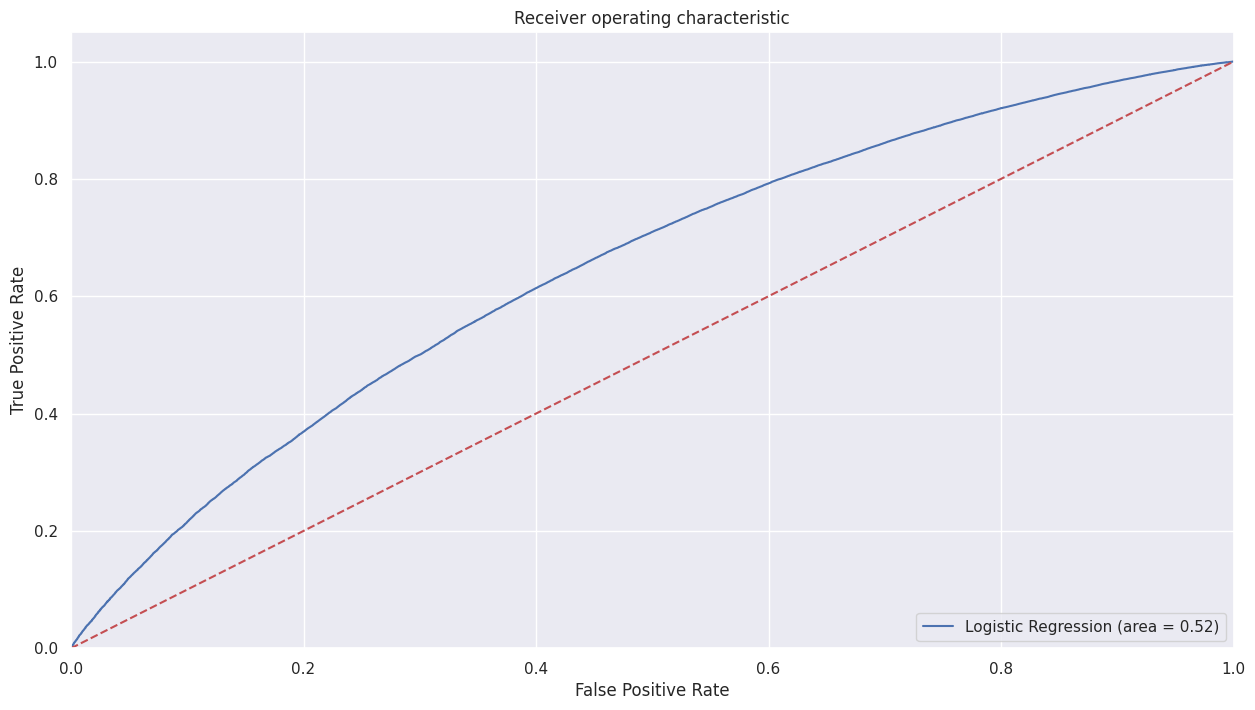

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
print(logit_roc_auc)

0.521526537136476


In [ ]:
acc_test_LogReg = accuracy_score(y_test, y_pred)
prec_test_LogReg = precision_score(y_test, y_pred)
rec_test_LogReg = recall_score(y_test, y_pred)
print(f'''Accuracy (test): {acc_test_LogReg:.3f}
Precision (test): {prec_test_LogReg:.3f}
Recall (test): {rec_test_LogReg:.3f}''')

Accuracy (test): 0.791
Precision (test): 0.800
Recall (test): 0.982


In [ ]:
logreg_prob = logreg.predict_proba(X_test)[:, 1]

In [ ]:
precision0_04 = precision_score(y_test, logreg_prob > 0.50)
recall0_04 = recall_score(y_test, logreg_prob > 0.50)


precision0_04

0.7997509786442386

# Logistic Regression Precision Recall Curve

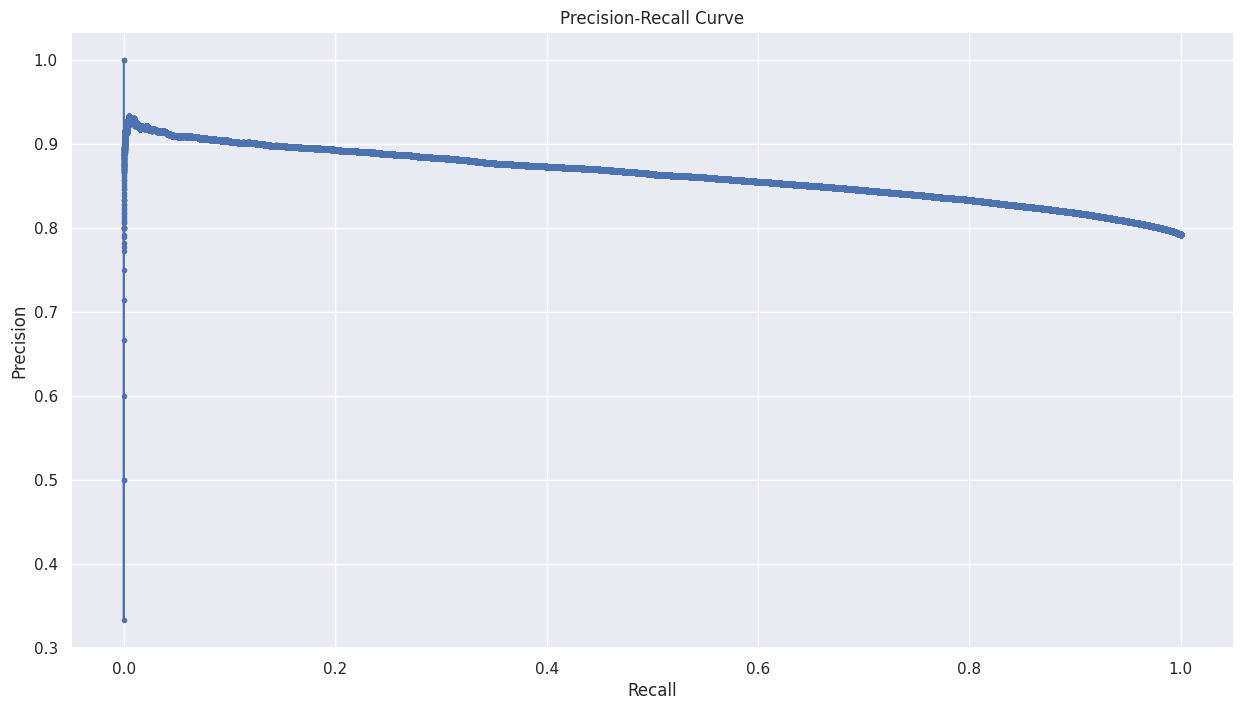

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, logreg_prob)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


# Model Understanding

There are two main approaches to comprehend and assess a model's performance. One involves using metrics such as accuracy, while the other entails utilizing model explainability.

In the context of machine learning, explainability refers to the ability to clarify the processes that occur within a model, from input to output. This attribute renders models transparent and amenable to review by various stakeholders. Moreover, it aids in the development of improved models.

In our specific scenario, it is imperative to establish trust among loan officers. They require a comprehensive understanding of why the model arrives at particular predictions. The evaluation conducted by loan officers encompasses not only model accuracy and metrics but also the model's explainability. Once they are comfortable with the explanations, they may grant approval for the model's integration into the business processes.

To achieve model explainability, we will employ SHAP (SHapley Additive exPlanations) as an explanation module. SHAP provides a method for estimating and illustrating the influence of each feature on the model's predictions. Our focus will be on two aspects:

1. Global Interpretability: This facet offers a holistic perspective on how the model operates, emphasizing the significance of individual features.

2. Local Interpretability: Here, the goal is to elucidate the rationale behind each individual prediction made by the model.

To address global interpretability, we will create visualizations of feature importance. This technique assigns scores to input features based on their predictive utility in relation to the target variable.

# Shap Interpretability

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.9 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
explainer = shap.Explainer(logreg, X_train)
shap_values = explainer (X_test)

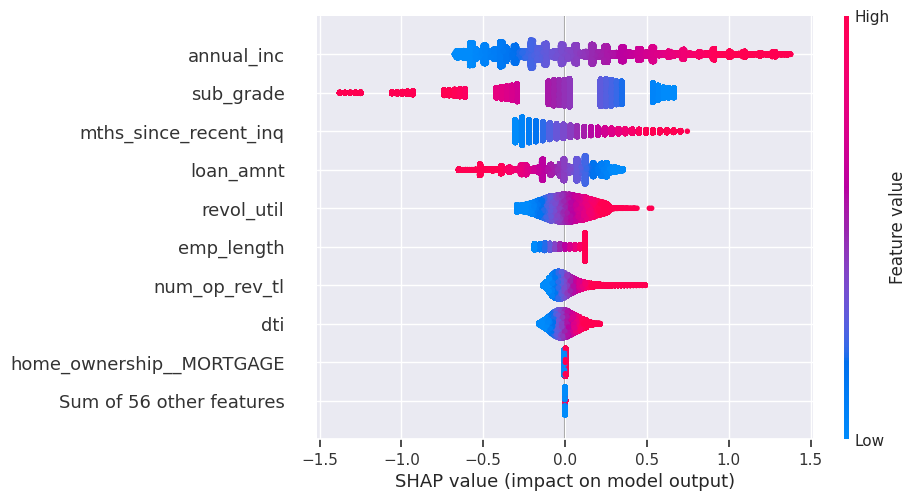

In [ ]:
shap.plots.beeswarm(shap_values)

In this chart blue and red mean the feature value, e.g. annual income blue is a smaller value e.g. 40K USD, and red is a higher value e.g. 100K USD. The width of the bars represents the number of observations on a certain feature value, for example with the annual_inc feature we can see that most of the applicants are within the lower-income or blue area. And on axis x negative SHAP values represent applicants that are likely to churn and the positive values on the right side represent applicants that are likely to pay the loan back.

What we are learning from this chart is that features such as annual_inc and sub_grade are the most impactful features driving the outcome prediction. The higher the salary is, or the lower the subgrade is, the more likely the applicant to pay the loan back and vice versa, which makes total sense in our case.

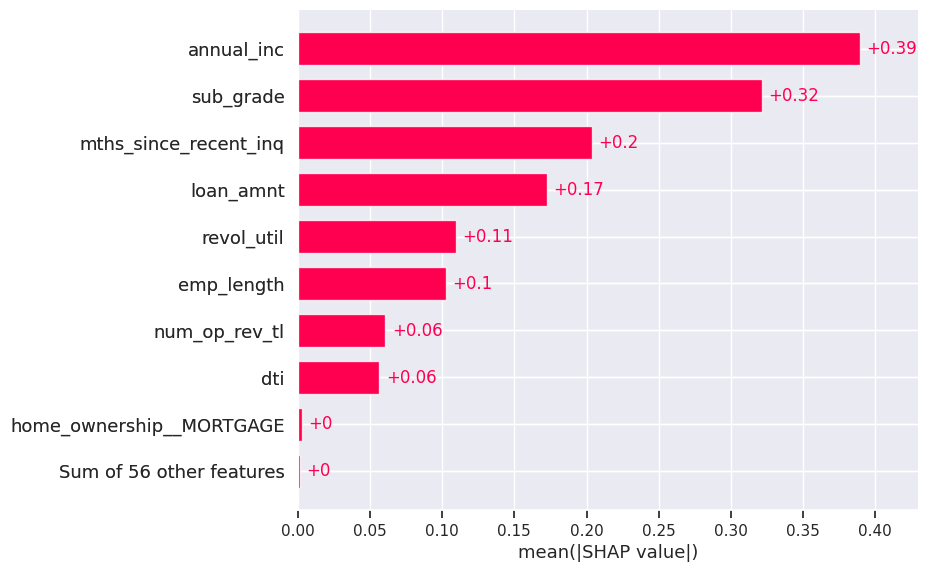

In [ ]:
shap.plots.bar(shap_values)

For local interpretability, let’s look into a few individual predictions and understand what features are driving the outcome. Let’s pick up an applicant who’s got 104K annual income, 10 years of working experience, with good sub_grade and small 4% debt to income.

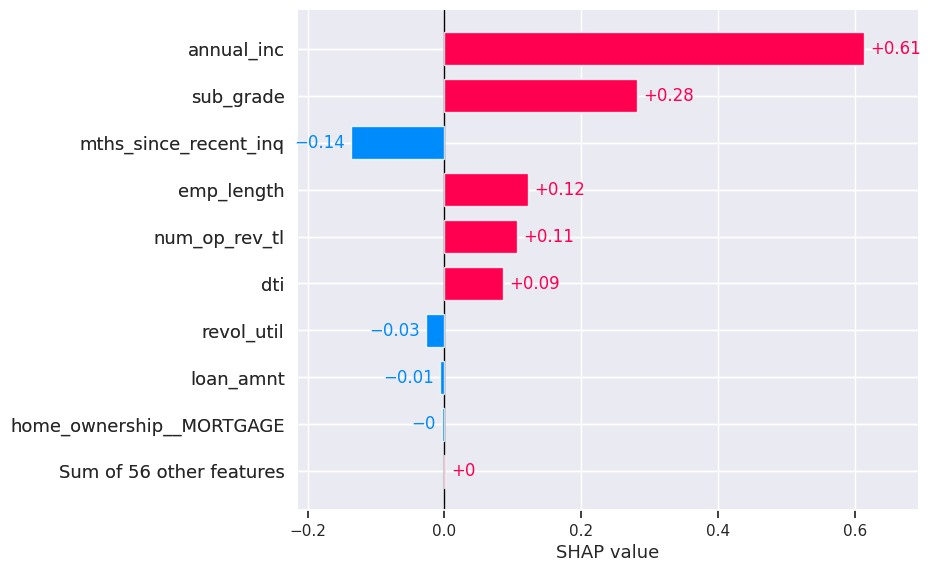

In [ ]:
shap.plots.bar(shap_values[4])
# good - 104K Annual Income, 10 Years of Experience, Good sub_grade, 4% DTI very small

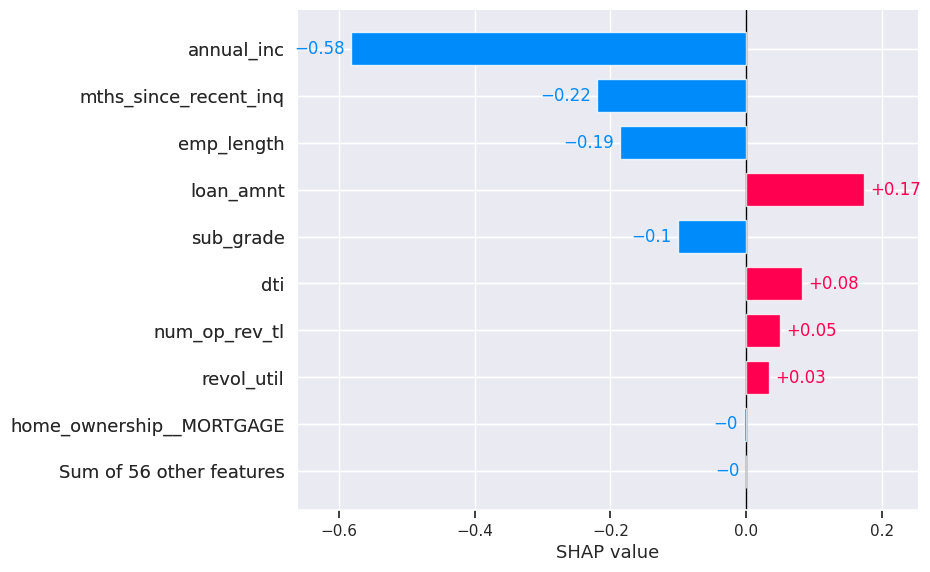

In [ ]:
shap.plots.bar(shap_values[5])
# not paying back - 40K Annual Income, 0 Years of Experience, not good sub_grade, 2% DTI very small but does make sense since probably started to work

# Conclusion

We have completed the second part of the project, where we have used the logistic regression model from the previous part continuation to the second part, and we applied the SHAP Technique and evaluating a simple model, and found the issues within the model.